# Assignment 12

### 1.复习上课内容

### 2.回答以下理论问题

#### 1. 请写一下TF-IDF的计算公式

$tf_{t,d} = count(t,d)$

$idf_t = log_{10}(\frac{N}{d_{ft}})$

#### 2. LDA算法的基本假设是什么？

1、每个文档的主题服从一个分布

2、每个主题的单词服从一个分布

#### 3. 在TextRank算法中构建图的权重是如何得到的？

$$WS(V_i) = (1-d) + d*\sum_{j\in I_n(V_i)}\frac{w_{ji}}{\sum_{V_k\in Out(V_j)}w_{jk}}WS(V_j)$$

#### 4. 什么是命名实体识别？ 有什么应用场景？

将文档中的实体（例如人名，地名，机构名等等）标注出来

应用场景：维基百科中可以将文档中出现的人名，地名等等用超链接辨识出来

#### 5.NLP主要有哪几类任务 ？

分类：情感分类，文本分类

生成：机器翻译，对话机器人

### 3.实践题

#### 3.1 手动实现TextRank算法 (在新闻数据中随机提取100条新闻训练词向量和做做法测试）

 提示：
 1. 确定窗口，建立图链接。   
 2. 通过词向量相似度确定图上边的权重
 3. 根据公式实现算法迭代(d=0.85)

In [123]:
# extract data
import gensim
from gensim.models.word2vec import Word2Vec
import pandas as pd
import jieba
import re
import math
import numpy as np
import random
data = pd.read_csv("../../datasource/sqlResult_1558435.csv",encoding='gb18030')
data = data.fillna('')

In [124]:
random_index = list(np.random.randint(0,89610,100))
data = data['content'][random_index].to_list()

In [133]:
def cut(string): return jieba.lcut(string)
def token(string):
    string = re.sub('[a-zA-Z0-9'
           '１２３４５６７８９０'
           'ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ'
           'ｅｓｎｇｒｉｋｄｃｈａｔｖｘｙｚｏｌｍｐｆｕ'
           '!；：．·、…【】《》“”‘’！？"#$%&％\'?@，。〔〕［］（）()*+,-——\\./:;<=>＋×／'
           '①↑↓★▌▲●℃[\\]^_`{|}~\s]+',
           "",string)
    return re.findall(r'[\d|\w]+',string)

In [134]:
news_data = [token(n) for n in data]
news_data = [''.join(n) for n in news_data]
news_data = [cut(n) for n in news_data]

In [190]:
model= Word2Vec(news_data,min_count=0)

In [165]:
from collections import defaultdict
connection = defaultdict(list)
for i,word in enumerate(news_data[1]):
    if i==0:
        connection[word].append(news_data[1][i+1])
    elif i==len(news_data[1])-1:
        connection[word].append(news_data[1][i-1])
    else:
        connection[word].append(news_data[1][i+1])
        connection[word].append(news_data[1][i-1])

/Users/macbookair/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


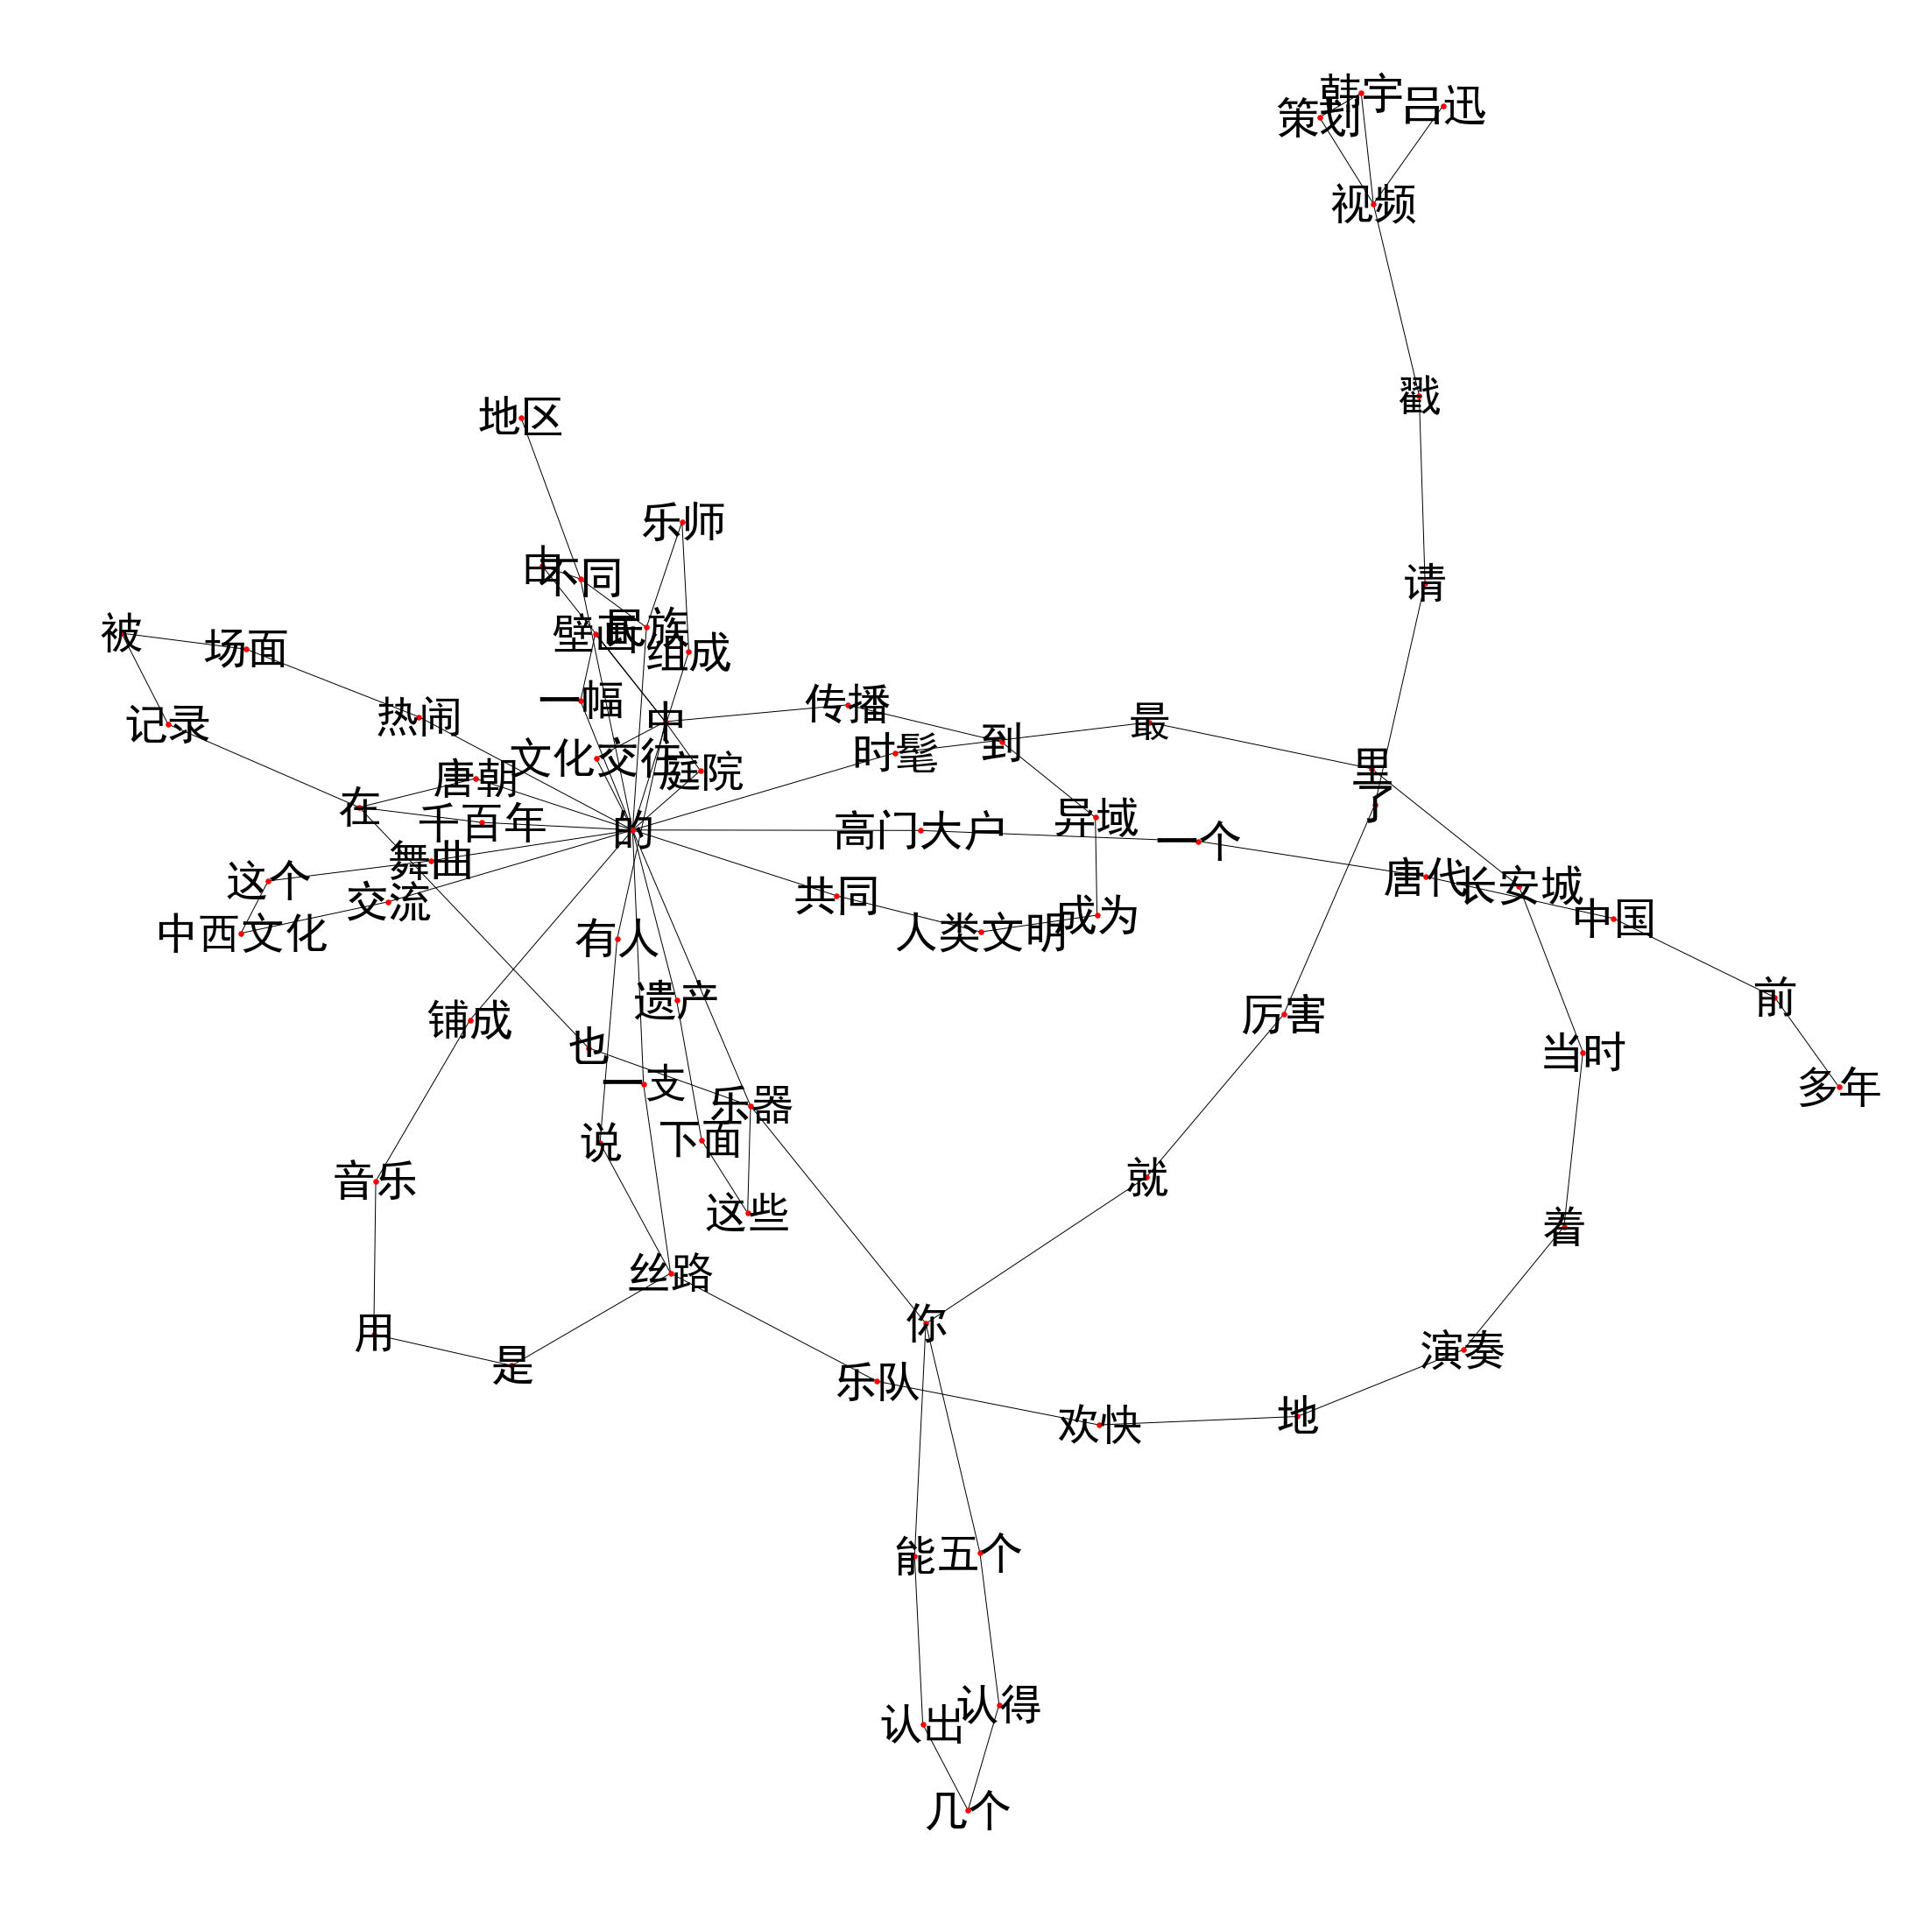

In [197]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
text_rank = nx.Graph(connection)
for a,b in text_rank.edges:
    weight = model.wv.distance(a,b)
    text_rank.edges[a, b].update({"weight": weight})
plt.figure(figsize=(30,30))
nx.draw(text_rank,node_size=30,with_labels=True,font_size=50)

In [202]:
sorted(nx.pagerank(text_rank).items(),key=lambda x:x[1],reverse=True)

[('的', 0.0791830561409955),
 ('中', 0.02846626570378933),
 ('视频', 0.024574636833602875),
 ('丝路', 0.02255240129718175),
 ('乐器', 0.021291518020251424),
 ('你', 0.019120548133039105),
 ('不同', 0.01862540782409554),
 ('在', 0.016646080793747187),
 ('民族', 0.01619318402205038),
 ('唐代', 0.014890321286543069),
 ('前', 0.014792560657966563),
 ('长安城', 0.014189438789497239),
 ('演奏', 0.013988248424950254),
 ('中国', 0.013944031133822931),
 ('几个', 0.013603586273711395),
 ('请', 0.01360146015134973),
 ('着', 0.013575890712022837),
 ('认出', 0.013559334803517262),
 ('地', 0.01344681795400229),
 ('场面', 0.013397761190261747),
 ('当时', 0.013324731488427886),
 ('厉害', 0.013294029877163976),
 ('认得', 0.013279147370138931),
 ('异域', 0.013233821161097354),
 ('到', 0.013085688539324906),
 ('中西文化', 0.012991083548157083),
 ('里', 0.012969458129008345),
 ('欢快', 0.012939015109980682),
 ('了', 0.012724848757314444),
 ('人类文明', 0.012700330130457217),
 ('戳', 0.012697695105544436),
 ('策划', 0.012654949644064422),
 ('一个', 0.0125977292826

#### 选做 1.  提取新闻人物里的对话。(使用以上提取小数据即可）

提示：    
1.寻找预料里具有表示说的意思。    
2.使用语法分析提取句子结构。    
3.检测谓语是否有表示说的意思。

#### 选择2. ： 电影评论分类。

在这个作业中你要完成一个电影评论分类任务。

1.数据获取。（采用爬虫技术爬取相关网页上的电影评论数据，例如猫眼电影评论，豆瓣电影评论）

In [3]:
from bs4 import BeautifulSoup
import requests
import random
import string
def get_html(url):
#     cookies = "gr_user_id=c82867c9-b703-4e4f-a4ea-6bc7915682bb; _vwo_uuid_v2=FCFAD00A58028F18479465DB2D96D69B|8edae85e61ea591c11802a8e509ae78a; douban-fav-remind=1; ll=\"108149\"; bid=TaMudUdhibQ; __utmv=30149280.12214; douban-profile-remind=1; viewed=\"1813841_30236842\"; __utmz=30149280.1584739422.40.13.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utmz=223695111.1584739422.287.12.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utmc=30149280; __utmc=223695111; _pk_ref.100001.4cf6=%5B%22%22%2C%22%22%2C1586967303%2C%22https%3A%2F%2Fwww.google.com%2F%22%5D; _pk_id.100001.4cf6=86c82a68d92c0876.1464066124.318.1586967303.1586965386.; _pk_ses.100001.4cf6=*; __utma=30149280.1857243150.1464066116.1586964215.1586967303.47; __utmb=30149280.0.10.1586967303; __utma=223695111.1968900248.1464066116.1586964215.1586967303.294; __utmt=1; __utmb=223695111.1.10.1586967303"
    HEADER = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36",
                "Referer":url,
              "Cookie":"bid=%s" % "".join(random.sample(string.ascii_letters + string.digits, 11))
             }
    # values = {'username' : 'cqc',  'password' : 'XXXX' }
    req = requests.get(url,headers=HEADER)
    req.headers
    req.encoding = 'utf-8'
    text = req.text
#     with open("./text.html",'w') as f:
#         f.write(text)
#         f.close()
    return text

In [4]:
def remove_all(List,item):
    while True:
        try:
            List.remove(item)
        except:
            break

In [314]:
# get page of top 250
import json

i = 0
movie_page = {}
while i<250:
    url = 'https://movie.douban.com/top250?start=' + str(i) + '&filter='
    text = get_html(url)
    soup = BeautifulSoup(text,features='lxml')
    remove_all(soup.body.ol.contents,"\n")
    Movie_list = soup.body.ol.contents
    for Movie in Movie_list:
        murl = Movie.a["href"]
        name = Movie.a.img["alt"]
        movie_page[name] = murl
    i+=25
fp = open("movie_page.json",'w')
json.dump(movie_page,fp)
fp.close()

In [5]:
import json
fp = open("movie_page.json",'r')
movie_page = json.load(fp)
fp.close()

In [6]:
movie_page

{'肖申克的救赎': 'https://movie.douban.com/subject/1292052/',
 '霸王别姬': 'https://movie.douban.com/subject/1291546/',
 '阿甘正传': 'https://movie.douban.com/subject/1292720/',
 '这个杀手不太冷': 'https://movie.douban.com/subject/1295644/',
 '美丽人生': 'https://movie.douban.com/subject/1292063/',
 '泰坦尼克号': 'https://movie.douban.com/subject/1292722/',
 '千与千寻': 'https://movie.douban.com/subject/1291561/',
 '辛德勒的名单': 'https://movie.douban.com/subject/1295124/',
 '盗梦空间': 'https://movie.douban.com/subject/3541415/',
 '忠犬八公的故事': 'https://movie.douban.com/subject/3011091/',
 '海上钢琴师': 'https://movie.douban.com/subject/1292001/',
 '楚门的世界': 'https://movie.douban.com/subject/1292064/',
 '三傻大闹宝莱坞': 'https://movie.douban.com/subject/3793023/',
 '机器人总动员': 'https://movie.douban.com/subject/2131459/',
 '放牛班的春天': 'https://movie.douban.com/subject/1291549/',
 '星际穿越': 'https://movie.douban.com/subject/1889243/',
 '大话西游之大圣娶亲': 'https://movie.douban.com/subject/1292213/',
 '熔炉': 'https://movie.douban.com/subject/5912992/',
 '疯狂动

In [8]:
import pandas as pd
dataset = pd.DataFrame(columns=("movie","star","comment"))

In [ ]:
import time
for movie,url in movie_page.items():
    i = 0
    print("extracting {} now".format(movie))
    for rank in ['h','m','l']:
        while i<200:
#             try:
            text = get_html(url+"comments/?start="+str(i)+"&limit=20&sort=new_score&status=P&percent_type="+rank)
            soup = BeautifulSoup(text,features='lxml')
            star = []
            comments = []
            for comment in soup.find_all(class_="comment"):  
                star.append(comment.find(class_=re.compile("^allstar"))["class"][0][-2])
                comments.append(comment.find(class_="short").string)
            tmp_set = pd.DataFrame({
                "movie":movie,
                "star":star,
                "comment":comments
            })
            dataset = dataset.append(tmp_set,ignore_index=True)
#             except:
#                 break
            time.sleep(1)
            i += 20
    print("finish extract {}".format(movie))
dataset.to_csv("movie_comment_new.csv",encoding='gb18030')    

extracting 肖申克的救赎 now
finish extract 肖申克的救赎
extracting 霸王别姬 now
finish extract 霸王别姬
extracting 阿甘正传 now
finish extract 阿甘正传
extracting 这个杀手不太冷 now
finish extract 这个杀手不太冷
extracting 美丽人生 now
finish extract 美丽人生
extracting 泰坦尼克号 now
finish extract 泰坦尼克号
extracting 千与千寻 now


In [27]:
import pandas as pd
dataset = pd.read_csv("movie_comment_new.csv",encoding='gb18030',lineterminator="\n")

2.把所获得数据分解为训练集，验证集和测试集。

In [33]:
del dataset['Unnamed: 0']
del dataset['Unnamed: 0.1']

In [38]:
dataset

,comment,movie,star
0,令人惊艳的马桶,猜火车,4
1,世界在边，音乐在变，连毒品也在边，你不会越来越年轻,猜火车,5
2,那恶心的厕所。,猜火车,4
3,墮落也需要天分。,猜火车,5
4,啊，马桶世界无比神奇,猜火车,5
...,...,...,...
146568,这个我是真觉得不行，逻辑硬伤太多，主角塑造的我也不是很喜欢（虽然这部片感觉只有她一个人是合情...,穿越时空的少女,2
146569,少女懵时代,穿越时空的少女,2
146570,坚持了大概半个多小时，看不下去了，节奏很慢，前期故事比较无聊。后面再精彩也比较难吸引我了。,穿越时空的少女,1
146571,那时候流行这种风格的男主吧。“我在未来等你”“我马上去，跑着去”，是出自这里吗？,穿越时空的少女,2


3.选用相应算法构建模型，并测试。

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [17]:
class SelfAttention(nn.Module):
    '''
    Self Attention for a given Sequence
    input: Tensor(batch,sequence_length,embedding_size)
    output: Tensor(batch,sequence_length,embedding_size)
    '''
    def __init__(self,num_heads,emd_size):
        super(SelfAttention,self).__init__()
        self.h = num_heads
        self.Wq = nn.Linear(emd_size,emd_size*num_heads,bias=False)
        self.Wk = nn.Linear(emd_size,emd_size*num_heads,bias=False)
        self.Wv = nn.Linear(emd_size,emd_size*num_heads,bias=False)
        self.unifyheads = nn.Linear(num_heads*emd_size,emd_size)
        
    def forward(self,x):
        batch,seq_l,emd_size = x.size()
        h = self.h
        
        query = self.Wq(x).view(batch,seq_l,h,emd_size)
        key = self.Wk(x).view(batch,seq_l,h,emd_size)
        value = self.Wv(x).view(batch,seq_l,h,emd_size)
        
        key = key.transpose(1, 2).contiguous().view(batch * h, seq_l, emd_size)
        query = query.transpose(1, 2).contiguous().view(batch * h, seq_l, emd_size)
        value = value.transpose(1, 2).contiguous().view(batch * h, seq_l, emd_size)
        
        key = key/(emd_size**(1/4))
        query = query/(emd_size**(1/4))
        
        dot_product = torch.matmul(query,key.transpose(1,2))
        softmax = F.softmax(dot_product,dim=2)
        output = torch.matmul(softmax,value).view(batch,h,seq_l,emd_size)
        
        output = output.transpose(1, 2).contiguous().view(batch, seq_l, h * emd_size)
        
        return self.unifyheads(output)

In [18]:
class Transformer_block(nn.Module):
    '''
    The basic Unit of Transformer
    '''
    def __init__(self,num_heads,emd_size):
        super(Transformer_block,self).__init__()
        self.attention = SelfAttention(num_heads=num_heads,emd_size=emd_size)
        self.Norm1 = nn.LayerNorm(emd_size)
        self.Norm2 = nn.LayerNorm(emd_size)
        self.Feedforward = nn.Sequential(nn.Linear(emd_size,emd_size*4),
                                        nn.LeakyReLU(),
                                        nn.Linear(emd_size*4,emd_size))
    def forward(self,x):
        attention = self.attention(x)
        x = self.Norm1(x+attention)
        
        feedf = self.Feedforward(x)
        return self.Norm2(feedf+x)

In [19]:
class Transformer(nn.Module):
    '''
    Transformer model for sentiment classification
    '''
    def __init__(self,num_heads,emd_size,depth, seq_length, num_tokens, num_classes):
        super(Transformer,self).__init__()
        self.blocks = nn.ModuleList([])
        self.num_tokens = num_tokens
        self.token_emb = nn.Embedding(num_tokens, emd_size)
        self.pos_emb = nn.Embedding(seq_length, emd_size)
        for i in range(depth):
            self.blocks.append(Transformer_block(num_heads,emd_size))
        self.out_layer = nn.Linear(seq_length,num_classes)
    def forward(self,x):
        tokens = self.token_emb(x)
        b, t, k = tokens.size()
        positions = torch.arange(t)
        positions = self.pos_emb(positions)[None, :, :].expand(b, t, k)
        x = tokens + positions
        x = self.blocks(x)
        x = self.out_layer(x.mean(dim=1))
        return F.log_softmax(x, dim=1)

In [20]:
model = Transformer(num_heads=8,emd_size=256,depth=4,seq_length=20,num_tokens=80000,num_classes=5)

In [21]:
model

Transformer(
  (blocks): ModuleList(
    (0): Transformer_block(
      (attention): SelfAttention(
        (Wq): Linear(in_features=256, out_features=2048, bias=False)
        (Wk): Linear(in_features=256, out_features=2048, bias=False)
        (Wv): Linear(in_features=256, out_features=2048, bias=False)
        (unifyheads): Linear(in_features=2048, out_features=256, bias=True)
      )
      (Norm1): LayerNorm(torch.Size([256]), eps=1e-05, elementwise_affine=True)
      (Norm2): LayerNorm(torch.Size([256]), eps=1e-05, elementwise_affine=True)
      (Feedforward): Sequential(
        (0): Linear(in_features=256, out_features=1024, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Linear(in_features=1024, out_features=256, bias=True)
      )
    )
    (1): Transformer_block(
      (attention): SelfAttention(
        (Wq): Linear(in_features=256, out_features=2048, bias=False)
        (Wk): Linear(in_features=256, out_features=2048, bias=False)
        (Wv): Linear(in_f

#### 选择3：文章自动续写

在这个作业中你要完成一个文章自动续写的模型。

1.数据获取。（根据你的兴趣采用爬虫技术爬去相关网站上的文本数据内容：比如故事网站，小说网站等）

2.选取模型，并训练。

3.展示一些你模型的输出例子。